Insannul Imam Rohny Khoirri
G.231.22.0084

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')


Studi Kasus dari Senja: Daily number of customers on Desember

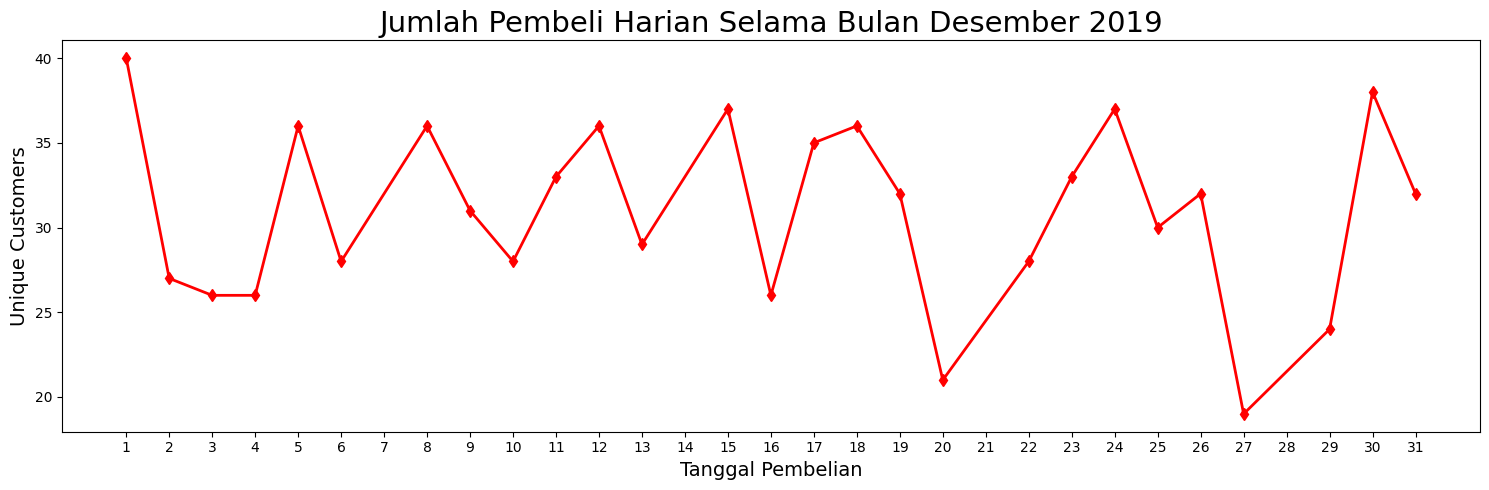

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'])
december_data = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()
plt.figure(figsize=(15, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='d', linestyle='-', linewidth=2, color='r')
plt.title('Jumlah Pembeli Harian Selama Bulan Desember 2019',fontsize=21)
plt.xlabel('Tanggal Pembelian',fontsize=14)
plt.ylabel('Unique Customers',fontsize=14)
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()

Case 1: Menentukan brand top 5

In [ ]:
brand_product_count = december_data.groupby('brand')['quantity'].sum().reset_index()
brand_product_count_sorted = brand_product_count.sort_values('quantity', ascending=False)
top_5_brands = brand_product_count_sorted.head(5)
print("Top 5 Brand:")
for index, row in top_5_brands.iterrows():
    print(f"{row['brand']}: {row['quantity']} produk.")

Top 5 Brand:
BRAND_S: 2197 produk.
BRAND_P: 2194 produk.
BRAND_R: 1508 produk.
BRAND_C: 1365 produk.
BRAND_A: 1315 produk.


Case 2: Multi-line chart daily quantity untuk brand top 5

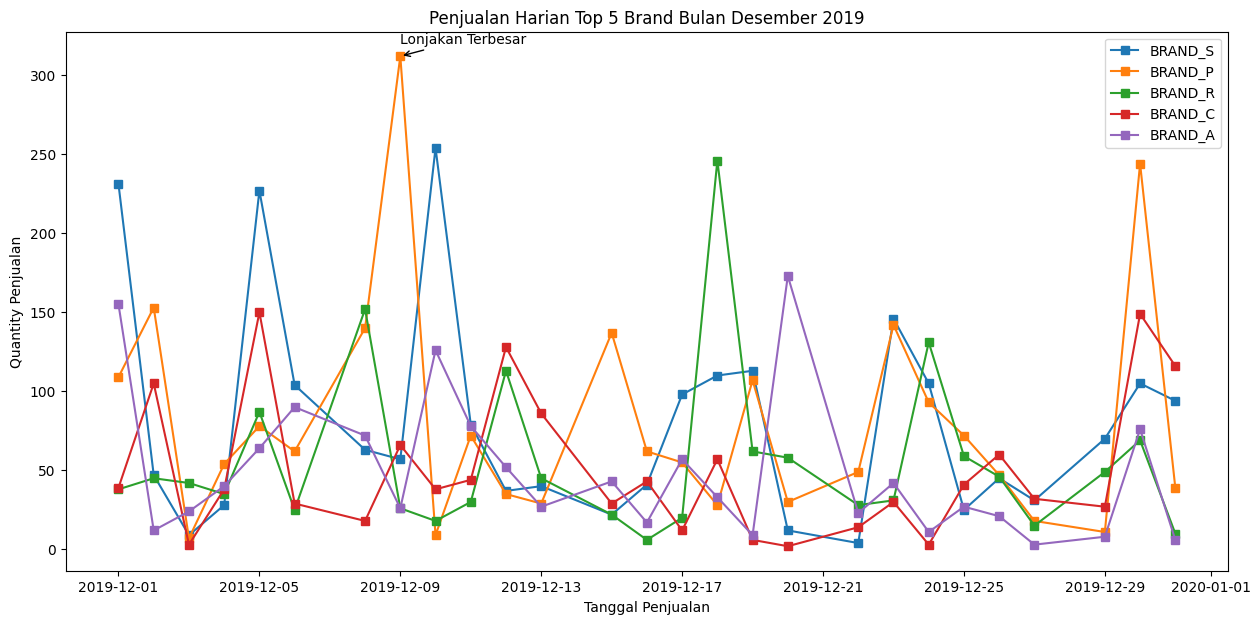

In [ ]:
daily_quantity = december_data.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()
top_5_brands = december_data.groupby('brand')['quantity'].sum().nlargest(5).index
plt.figure(figsize=(15, 7))
lonjakan_tanggal = None
lonjakan_quantity = None
for brand in top_5_brands:
    brand_data = daily_quantity[daily_quantity['brand'] == brand]
    plt.plot(brand_data['order_date'], brand_data['quantity'], marker='s', linestyle='-', label=brand)
    tanggal_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'order_date']
    quantity_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'quantity']
    if lonjakan_quantity is None or quantity_lonjakan > lonjakan_quantity:
        lonjakan_tanggal = tanggal_lonjakan
        lonjakan_quantity = quantity_lonjakan
plt.annotate('Lonjakan Terbesar', xy=(lonjakan_tanggal, lonjakan_quantity),
             xytext=(lonjakan_tanggal, lonjakan_quantity + 8),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='left')
plt.title('Penjualan Harian Top 5 Brand Bulan Desember 2019')
plt.xlabel('Tanggal Penjualan')
plt.ylabel('Quantity Penjualan')
plt.legend()
plt.show()



Case 3: Bar chart tiap produk yang laku

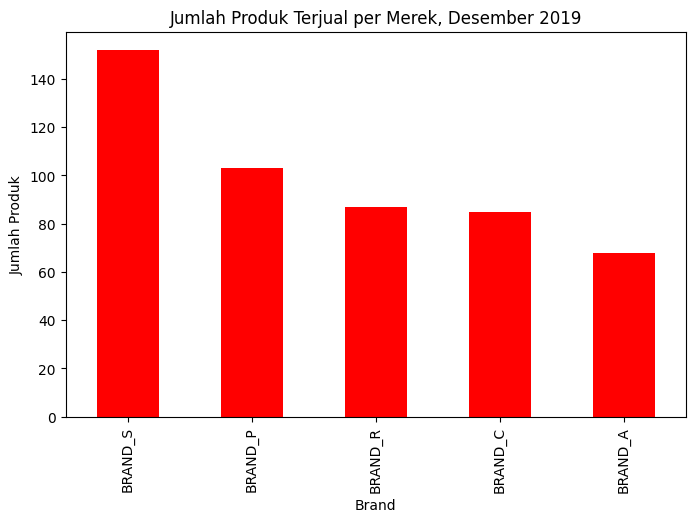

In [ ]:
plt.figure(figsize=(8, 5))
top_5_product = december_data.groupby('brand')['product_id'].nunique().sort_values(ascending=False).head(5).plot(kind='bar', color='red')
plt.title('Jumlah Produk Terjual per Merek, Desember 2019')
plt.xlabel('Brand')
plt.ylabel('Jumlah Produk')
plt.ylim(ymin=0)
plt.xticks(range (0,5))
plt.show()

Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019

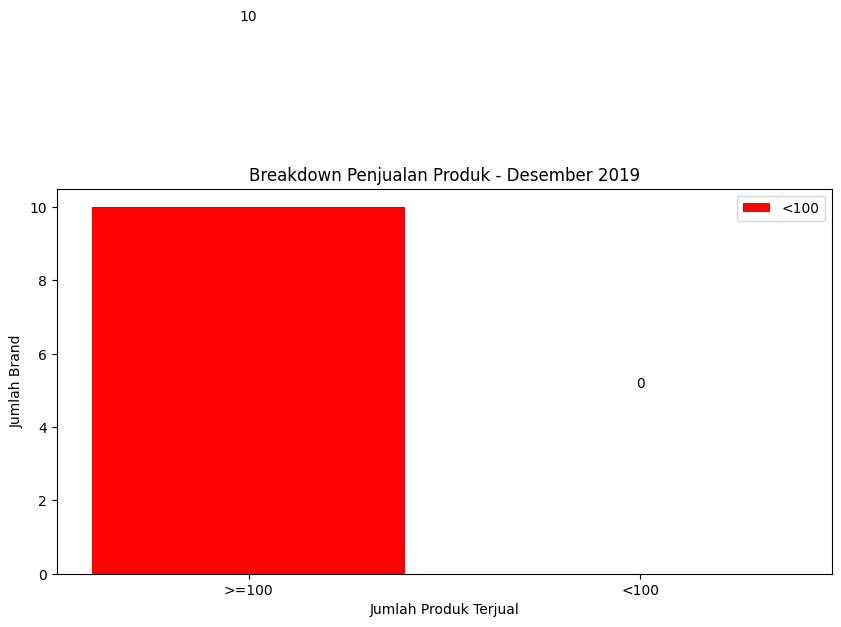

In [ ]:
brand_product_count_sorted['category'] = pd.cut(brand_product_count_sorted['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'] )
category_counts = brand_product_count_sorted['category'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(category_counts.index, category_counts.values, color='red')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Jumlah Brand')
plt.title('Breakdown Penjualan Produk - Desember 2019')
plt.legend(['<100', '>=100'])
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()

Case 5: Murah atau mahalkah harga produk brand top 5

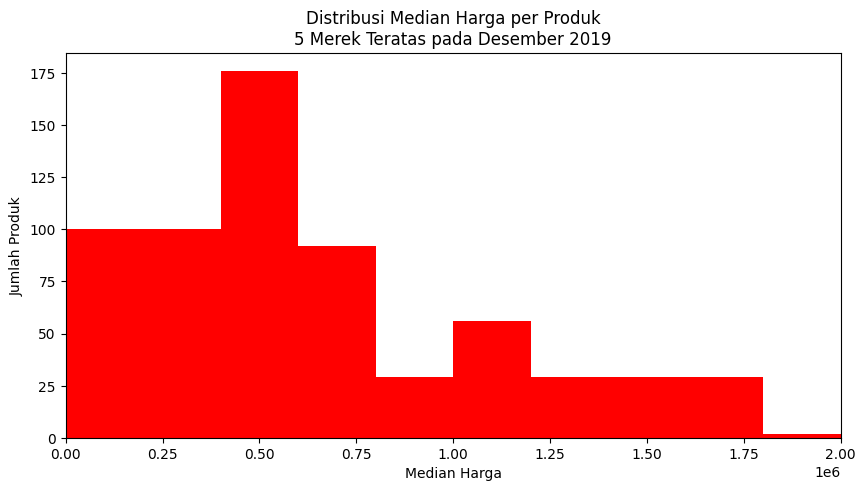

In [10]:
plt.figure(figsize=(10,5))
plt.hist(december_data.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='red')
plt.title('Distribusi Median Harga per Produk\n5 Merek Teratas pada Desember 2019')
plt.xlabel('Median Harga')
plt.ylabel('Jumlah Produk')
plt.xlim(xmin=0,xmax=2000000)
plt.show()

Case 6a: Korelasi quantity vs GMV

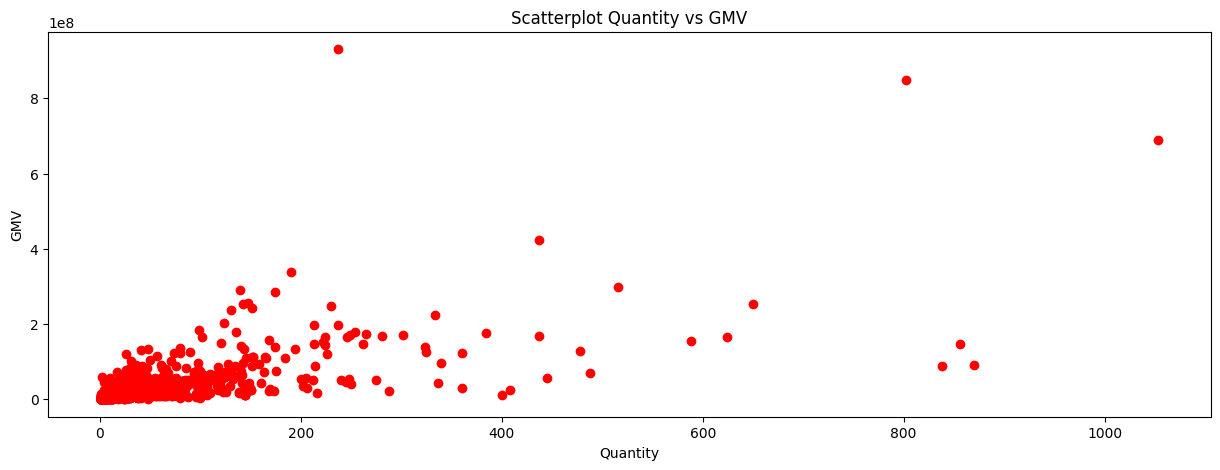

In [ ]:
df['GMV'] = df['quantity'] * df['item_price']
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()
plt.figure(figsize=(15, 5))
plt.scatter(data_product['quantity'], data_product['GMV'], color='red')
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Scatterplot Quantity vs GMV')
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.show()


Case 6b: Korelasi median harga vs quantity


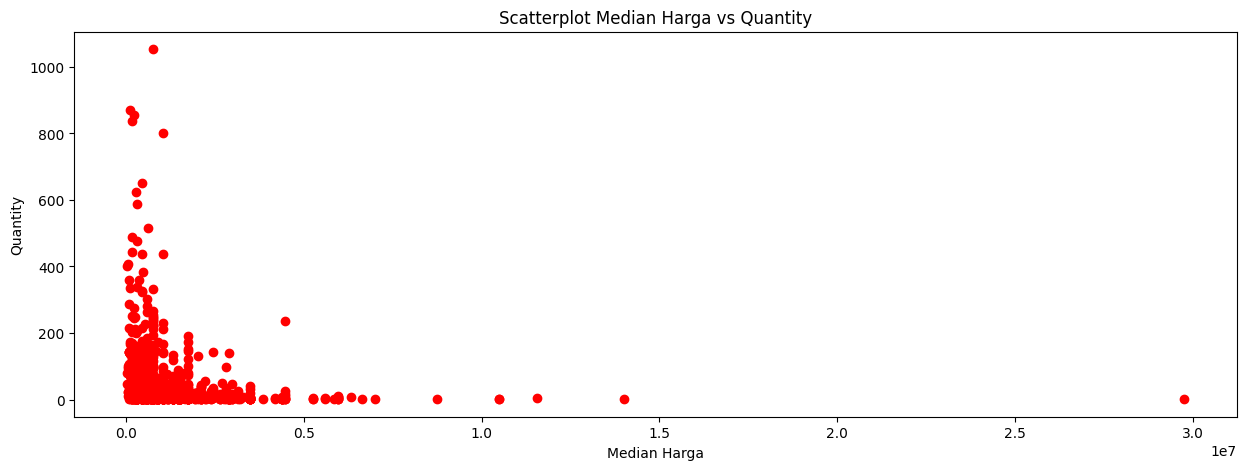

In [ ]:
df['GMV'] = df['quantity'] * df['item_price']
data_product = df.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()
plt.figure(figsize=(15, 5))
plt.scatter(data_product['item_price'], data_product['quantity'], color='red')
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.title('Scatterplot Median Harga vs Quantity')
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.show()